In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
path = "gdrive/My Drive/Colab Notebooks/Computer Vision with OpenCV and Deep Learning/Image Processing/DATA/"

In [4]:
dark_horse = cv2.imread(path + "horse.jpg")
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread(path + "rainbow.jpg")
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread(path + "bricks.jpg")
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

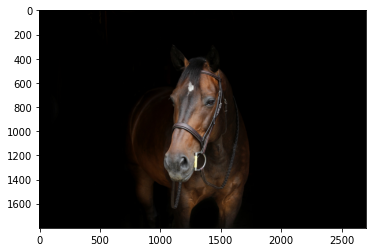

In [5]:
plt.imshow(show_horse)

In [6]:
hist_values = cv2.calcHist([blue_bricks], channels=[0], mask=None, histSize=[256], ranges=[0,256]) #BGR

In [7]:
hist_values.shape

(256, 1)

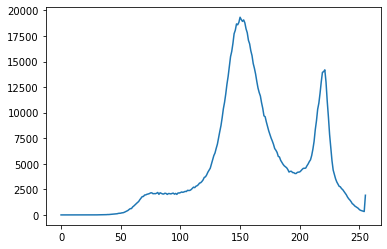

In [8]:
plt.plot(hist_values)

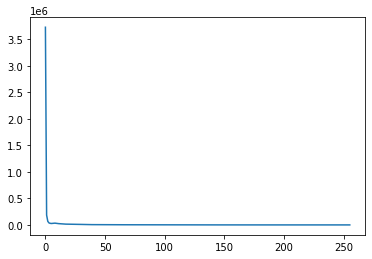

In [9]:
hist_values = cv2.calcHist([dark_horse], channels=[0], mask=None, histSize=[256], ranges=[0,256]) #BGR
plt.plot(hist_values)

Text(0.5, 1.0, 'Histogram for Blue Bricks')

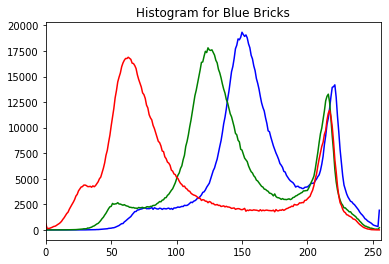

In [10]:
img = blue_bricks
color = ("b", "g", "r")

for i, col in enumerate(color):
  histr = cv2.calcHist([img], [i], None, [256], [0,256])
  plt.plot(histr, color=col)
  plt.xlim([0,256])

plt.title("Histogram for Blue Bricks")

Text(0.5, 1.0, 'Histogram for Horse')

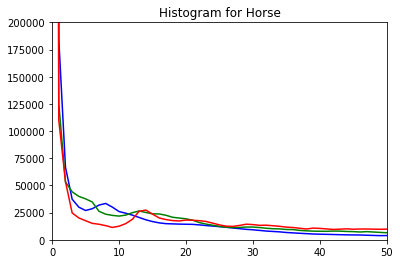

In [11]:
img = dark_horse
color = ("b", "g", "r")

for i, col in enumerate(color):
  histr = cv2.calcHist([img], [i], None, [256], [0,256])
  plt.plot(histr, color=col)
  plt.xlim([0,50])
  plt.ylim([0,200000])

plt.title("Histogram for Horse")

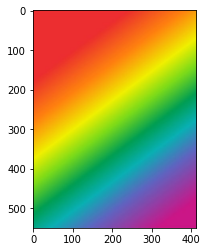

In [12]:
rainbow = cv2.imread(path + "rainbow.jpg")
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)
plt.imshow(show_rainbow)

In [26]:
img = show_rainbow.copy()
mask = np.zeros(img.shape[:2], np.uint8)
mask.shape

(550, 413)

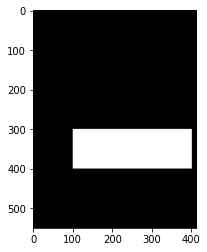

In [27]:
mask[300:400, 100:400] = 255
plt.imshow(mask, cmap="gray")

In [28]:
img.shape

(550, 413, 3)

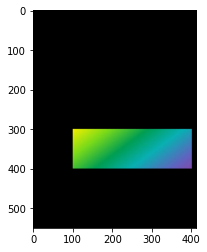

In [29]:
masked_img = cv2.bitwise_and(img, img, mask=mask)
show_masked_img = cv2.bitwise_and(show_rainbow, show_rainbow, mask=mask)
plt.imshow(masked_img)

In [30]:
hist_mask_values_red = cv2.calcHist([rainbow], channels=[2], mask=mask,
                                    histSize=[256], ranges=[0,256])

In [31]:
hist_values_red = cv2.calcHist([rainbow], channels=[2], mask=None,
                                    histSize=[256], ranges=[0,256])

Text(0.5, 1.0, 'Red for Mask')

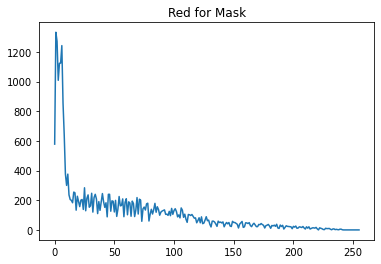

In [33]:
plt.plot(hist_mask_values_red)
plt.title("Red for Mask")

Text(0.5, 1.0, 'Red')

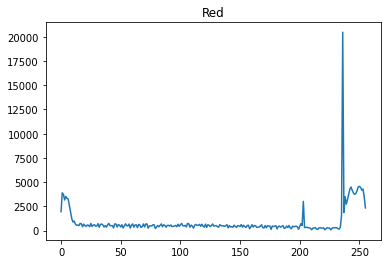

In [34]:
plt.plot(hist_values_red)
plt.title("Red")

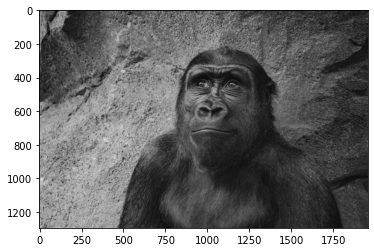

In [37]:
gorilla = cv2.imread(path + "gorilla.jpg", 0)
show_gorilla = cv2.cvtColor(gorilla, cv2.COLOR_BGR2RGB)
plt.imshow(show_gorilla)

In [38]:
def display(img, cmap=None):
  fig = plt.figure(figsize=(10,8))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap)

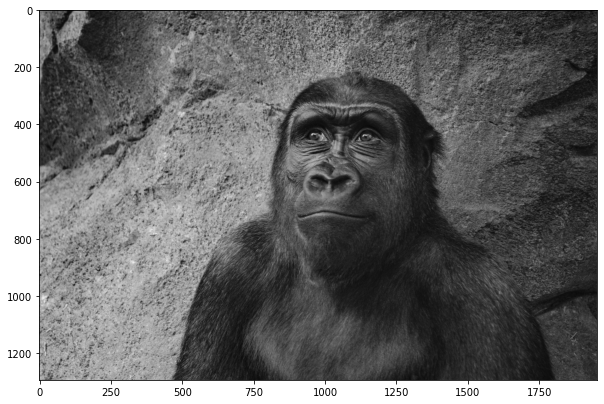

In [40]:
display(gorilla, "gray")

In [41]:
gorilla.shape

(1295, 1955)

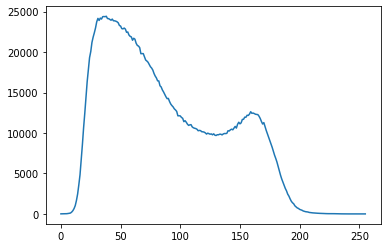

In [43]:
hist_values = cv2.calcHist([gorilla], channels=[0], mask=None,
                           histSize=[256], ranges=[0,256])
plt.plot(hist_values)

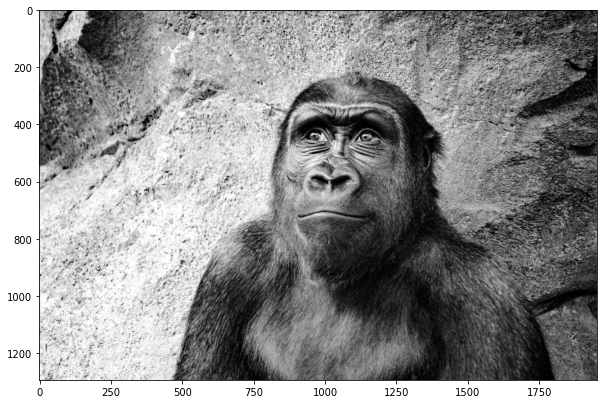

In [45]:
eq_gorilla = cv2.equalizeHist(gorilla)
display(eq_gorilla, "gray")

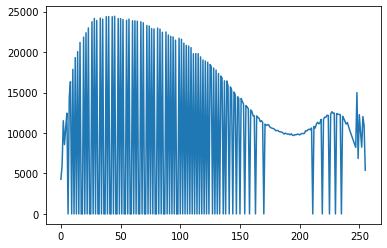

In [46]:
eq_hist_values = cv2.calcHist([eq_gorilla], channels=[0], mask=None,
                           histSize=[256], ranges=[0,256])
plt.plot(eq_hist_values)

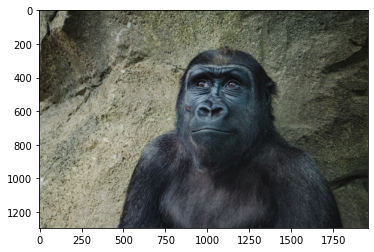

In [47]:
gorilla = cv2.imread(path + "gorilla.jpg")
show_gorilla = cv2.cvtColor(gorilla, cv2.COLOR_BGR2RGB)
plt.imshow(show_gorilla)

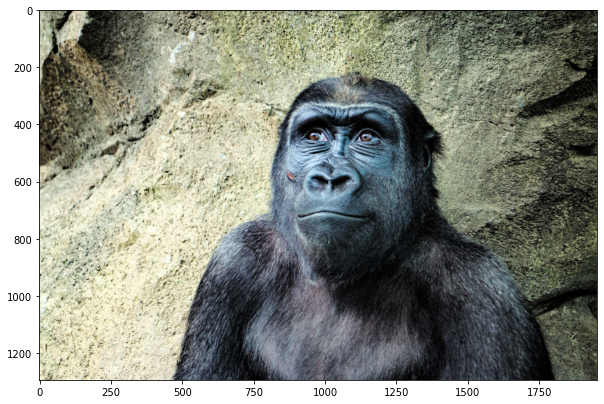

In [48]:
hsv = cv2.cvtColor(gorilla, cv2.COLOR_BGR2HSV)
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

show_gorilla = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
display(show_gorilla)